## Statistisk Analys av auto-mpg

### Medelvärde, Median och Standardavvikelse av auto-mpg

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

auto_mpg = pd.read_csv("./auto-mpg.csv")

auto_mpg.replace("?", np.nan, inplace=True) # I auto-mpg.csv så betäcknas saknad data som ett "?", så jag replacar alla "?" med NaN värde så att .mean .median .std funkar.

auto_mpg["horsepower"] = auto_mpg["horsepower"].astype(float) # Horsepower var den ända columnen som hade "?", så jag ändrade dtypen till float

mpg_to_acceleration = auto_mpg.drop(columns=["model year", "origin", "car name"]) # Skapar ett nytt dataframe där bara de numeriska columnerna är med

mean_mpg = mpg_to_acceleration.mean()
median_mpg = mpg_to_acceleration.median()
standard_mpg = mpg_to_acceleration.std()
print(f"Medelvärdena för varje del av datasettet är:")
print(mean_mpg)
print()
print(f"Median för varje del av datasettet är:")
print(median_mpg)
print()
print(f"Standardavvikelse för varje del av datasettet är:")
print(standard_mpg)

Medelvärdena för varje del av datasettet är:
mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.469388
weight          2970.424623
acceleration      15.568090
dtype: float64

Median för varje del av datasettet är:
mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
dtype: float64

Standardavvikelse för varje del av datasettet är:
mpg               7.815984
cylinders         1.701004
displacement    104.269838
horsepower       38.491160
weight          846.841774
acceleration      2.757689
dtype: float64


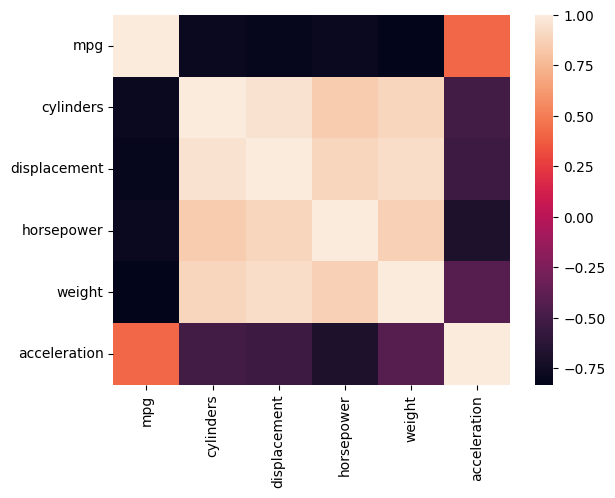

In [18]:
corr = auto_mpg[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]].corr()
sns.heatmap(corr)
plt.show()

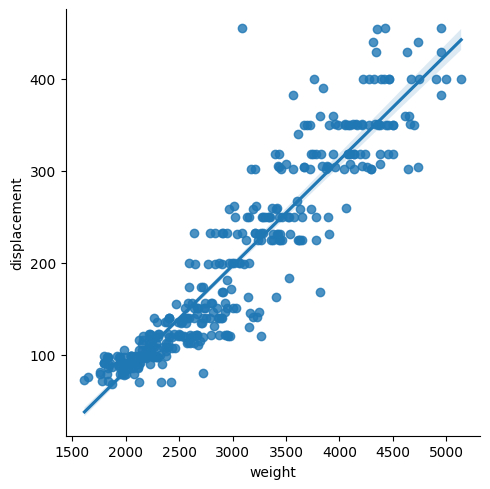

In [30]:
sns.lmplot(auto_mpg, x="weight", y="displacement")

In [35]:
substring = "ford"
ford = auto_mpg[auto_mpg["car name"].str.contains(substring, case=False)]
ford.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
17,21.0,6,200.0,85.0,2587,16.0,70,1,ford maverick
25,10.0,8,360.0,215.0,4615,14.0,70,1,ford f250
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
36,19.0,6,250.0,88.0,3302,15.5,71,1,ford torino 500
40,14.0,8,351.0,153.0,4154,13.5,71,1,ford galaxie 500
43,13.0,8,400.0,170.0,4746,12.0,71,1,ford country squire (sw)
48,18.0,6,250.0,88.0,3139,14.5,71,1,ford mustang
61,21.0,4,122.0,86.0,2226,16.5,72,1,ford pinto runabout


In [40]:
from scipy.stats import t

alpha_ford = 0.02
mean_ford = np.mean(ford["weight"])
n = len(ford["weight"])
sem = scs.sem(ford["weight"])

upper, lower = t.interval(confidence=1-alpha_ford, df=n-1, loc=mean_ford, scale=sem)

print(f"Konfidensintervallen (alpha = 0.02) för medelvikten av ford bilar är: {round(lower,1)}-{round(upper,1)}")

Konfidensintervallen (alpha = 0.02) för medelvikten av ford bilar är: 3576.2-3026.2
